### 4.10 Part 1.25 Yang Regular Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0YRC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(5940214, 30)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,5.940214e+06,5.940214e+06,5.940214e+06,5.940214e+06,5.940214e+06,5.940214e+06
mean,1.034371e+05,2.900433e+01,7.076521e+04,2.543953e+04,1.196901e+01,1.262994e+01
std,5.941013e+04,6.634711e+00,2.517698e+04,1.418911e+04,8.304438e+00,8.559707e+01
min,1.000000e+00,1.800000e+01,2.597200e+04,0.000000e+00,1.000000e+00,1.695238e+00
25%,5.178300e+04,2.300000e+01,5.623500e+04,1.324900e+04,5.000000e+00,7.390365e+00
50%,1.031560e+05,2.900000e+01,6.911400e+04,2.512900e+04,1.000000e+01,7.831022e+00
75%,1.551670e+05,3.500000e+01,8.504900e+04,3.777600e+04,1.700000e+01,8.256667e+00
max,2.061970e+05,4.000000e+01,3.979290e+05,4.968800e+04,4.000000e+01,4.174448e+03


### 3 -Analyzing YRC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','frequent_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,frequent_flag
0,4,33890,single,Non-frequent customer
1,39,125935,single,Regular customer
2,78,130797,married,Frequent customer
3,118,152052,single,Frequent customer
4,170,82820,married,Regular customer
...,...,...,...,...
30035,6527886,138442,married,Frequent customer
30036,6528122,205766,living with parents and siblings,Frequent customer
30037,6528151,83573,single,Regular customer
30038,6528229,122741,married,Non-frequent customer


#### -analyzing YRC by Frequent_flag and Family Status based on customers number

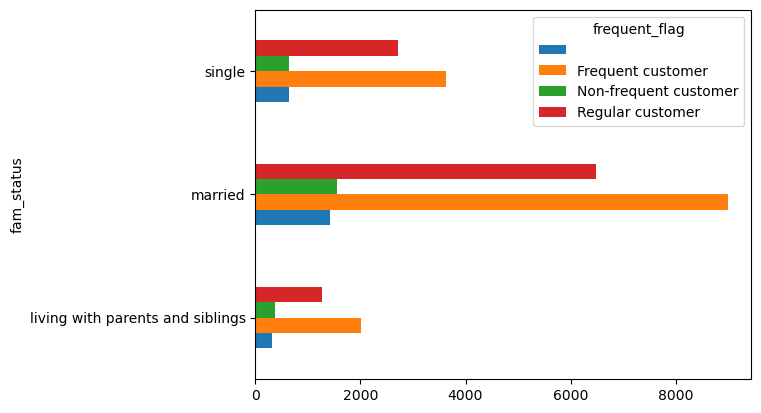

In [10]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [14]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_LoyaltyFlag.png'))

In [13]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag        
living with parents and siblings  Frequent customer        2001
                                  Regular customer         1269
                                  Non-frequent customer     377
                                                            309
married                           Frequent customer        8994
                                  Regular customer         6488
                                  Non-frequent customer    1556
                                                           1427
single                            Frequent customer        3625
                                  Regular customer         2711
                                  Non-frequent customer     648
                                                            635
Name: frequent_flag, dtype: int64

### -analyzing YRC by Frequent flag and Family Status based on purchase number

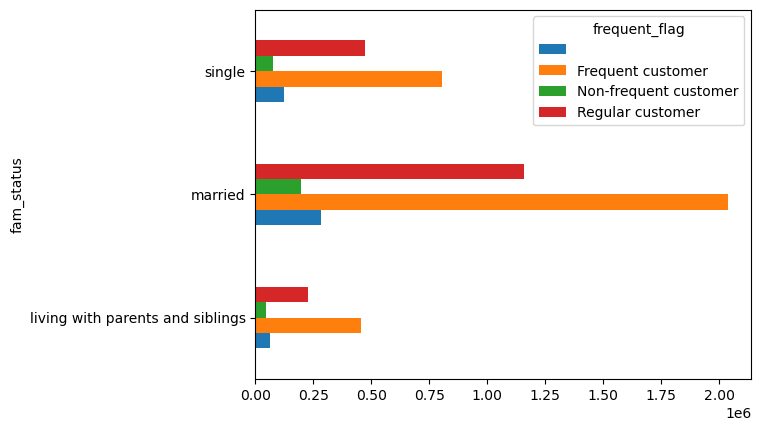

In [15]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [16]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_LoyaltyFlagSales.png'))

In [17]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag        
living with parents and siblings  Frequent customer        2001
                                  Regular customer         1269
                                  Non-frequent customer     377
                                                            309
married                           Frequent customer        8994
                                  Regular customer         6488
                                  Non-frequent customer    1556
                                                           1427
single                            Frequent customer        3625
                                  Regular customer         2711
                                  Non-frequent customer     648
                                                            635
Name: frequent_flag, dtype: int64

### 4 -analyzing YRC purshases by their income

In [18]:
df2=df[['prices', 'income']]

In [19]:
df2['prices'].sum()

74649799.70000009

In [20]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [21]:
df22

,mean_purshase
income,
25972,6.229545
25979,6.154762
26067,5.086765
26095,6.137037
26116,6.671975
...,...
388874,52.713374
390410,190.819753
392552,61.662545


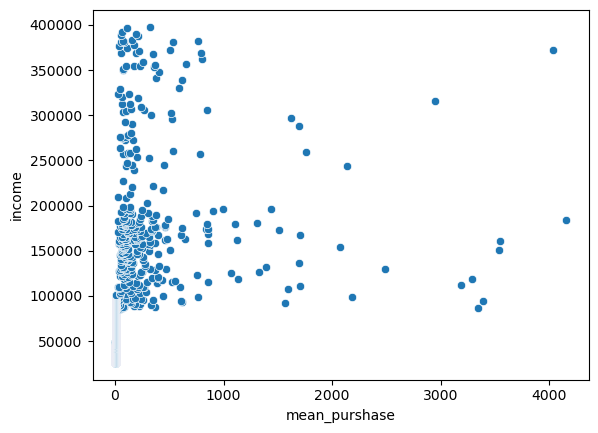

In [22]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [23]:
df22filtered=df22[df22['mean_purshase']<2000]

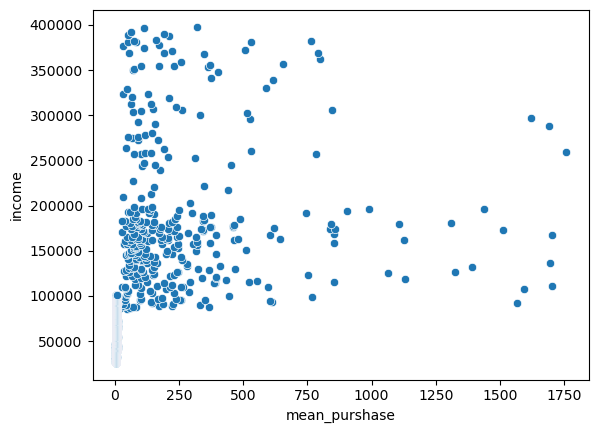

In [24]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [25]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_PricesIncome.png'))

### 5 - Analyzing YRC by Busiest_day

In [26]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [27]:
df4

,user_id,STATE,busiest_day,day_of_week
4,33890,New Mexico,Regularly days,6
5,33890,New Mexico,Busiest days,0
6,33890,New Mexico,Busiest days,1
7,33890,New Mexico,Regularly days,2
8,33890,New Mexico,Regularly days,6
...,...,...,...,...
6464332,122741,Michigan,Slowest days,3
6464333,122741,Michigan,Regularly days,6
6464334,122741,Michigan,Busiest days,1
6464335,122741,Michigan,Regularly days,6


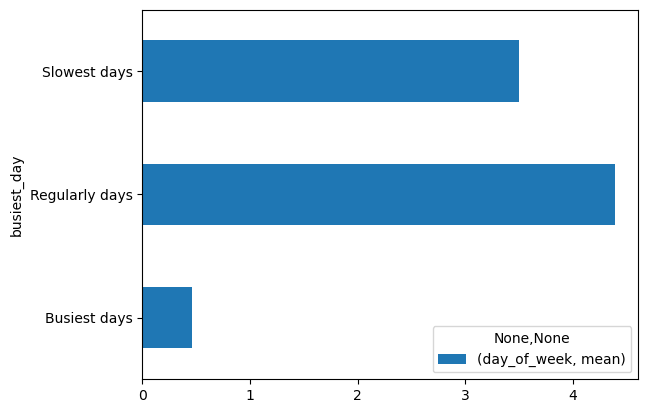

In [28]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [29]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_BusiestDayOfWeek.png'))

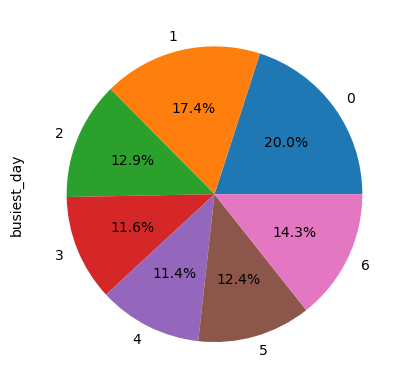

In [30]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [31]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    1189517
1    1032886
2     765804
3     688215
4     674595
5     736880
6     852317
Name: busiest_day, dtype: int64

In [32]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_pieBusiestDayOfWeek.png'))

### -YRC prefered hour of day

In [33]:
df44=df[['order_hour_of_day','user_id']]

In [34]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      42572
1      22833
2      14125
3       9853
4       9562
5      15786
6      50514
7     153282
8     297929
9     435493
10    498632
11    502914
12    486476
13    490672
14    495065
15    492854
16    473570
17    393040
18    308510
19    234291
20    175275
21    144054
22    117921
23     74991
Name: user_id, dtype: int64

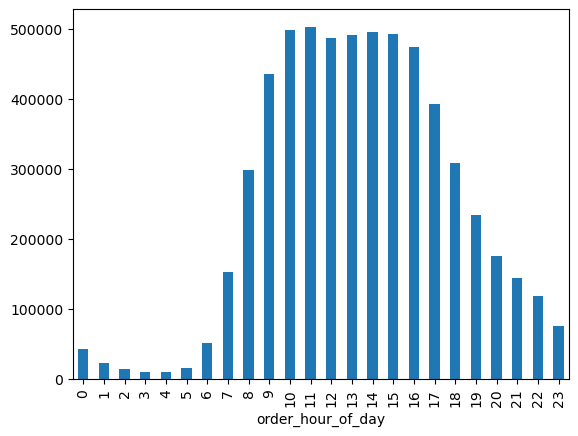

In [35]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [36]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_BusiestHourOfDay.png'))

### 6 - Analyzing number of YRC by State

In [37]:
df5=df[['user_id','STATE']]

In [38]:
DF5=df5.drop_duplicates().reset_index()

In [39]:
DF5

,index,user_id,STATE
0,4,33890,New Mexico
1,39,125935,Iowa
2,78,130797,Maryland
3,118,152052,Montana
4,170,82820,Virginia
...,...,...,...
30035,6527886,138442,North Carolina
30036,6528122,205766,Oregon
30037,6528151,83573,Michigan
30038,6528229,122741,Michigan


#### number of rows indicate total number of YRC =30040

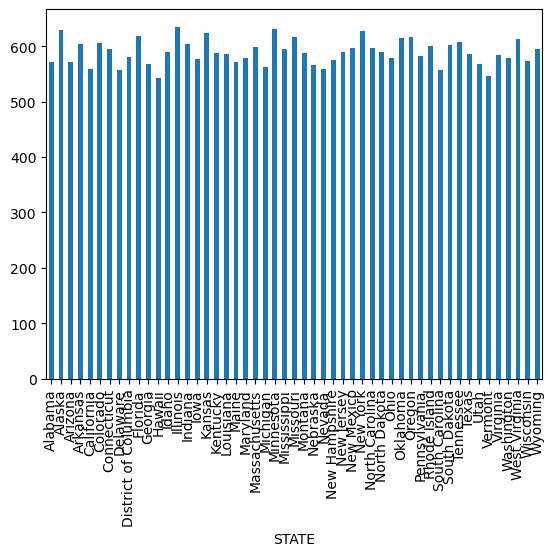

In [40]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [41]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 571
Alaska                  629
Arizona                 571
Arkansas                604
California              559
Colorado                605
Connecticut             594
Delaware                557
District of Columbia    580
Florida                 618
Georgia                 568
Hawaii                  543
Idaho                   590
Illinois                635
Indiana                 603
Iowa                    576
Kansas                  623
Kentucky                587
Louisiana               585
Maine                   572
Maryland                579
Massachusetts           598
Michigan                562
Minnesota               631
Mississippi             594
Missouri                616
Montana                 588
Nebraska                566
Nevada                  559
New Hampshire           575
New Jersey              590
New Mexico              596
New York                627
North Carolina          597
North Dakota            590
Ohio          

#### -defining 10 Top States

In [42]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Illinois         635
Minnesota        631
Alaska           629
New York         627
Kansas           623
Florida          618
Oregon           617
Missouri         616
Oklahoma         615
West Virginia    613
Name: user_id, dtype: int64

#### -saving the plot

In [43]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_UsersNumberState.png'))

### 7 - Analyzing YRC by n_dependants

In [44]:
df6=df[['user_id', 'n_dependants']]

In [45]:
DF6=df6.drop_duplicates()

In [46]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    7619
1    7437
2    7559
3    7425
Name: user_id, dtype: int64

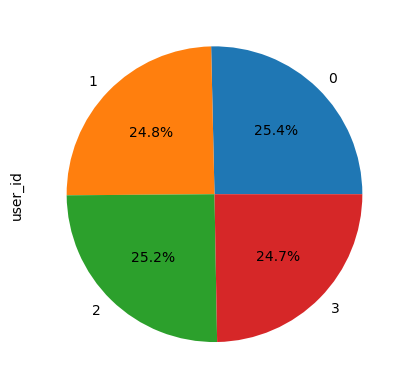

In [47]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [48]:
DF6

,user_id,n_dependants
4,33890,0
39,125935,0
78,130797,1
118,152052,0
170,82820,2
...,...,...
6527886,138442,1
6528122,205766,2
6528151,83573,0
6528229,122741,2


#### saving the plot

In [49]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_NDependansUsers.png'))

### 8 - Analyzing YRC Days since prior order

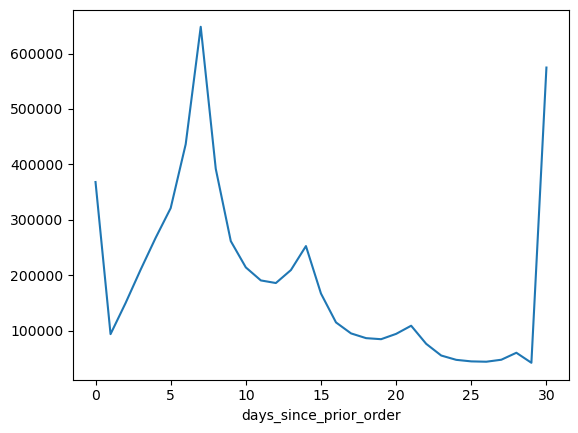

In [50]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [51]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     368082
1      93592
2     149709
3     209829
4     267368
5     320965
6     436334
7     648224
8     391893
9     261452
10    214010
11    190516
12    185808
13    209222
14    252511
15    166858
16    114733
17     94918
18     86367
19     84467
20     94073
21    108764
22     76107
23     55004
24     47196
25     44424
26     43813
27     47417
28     59982
29     41903
30    574673
Name: days_since_prior_order, dtype: int64

In [52]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_DaysSincePriorOrder.png'))

### 9- Defining YRC TOP products for client group


 #### creating subset

In [53]:
df18=df[['product_name','product_id','prices']]

In [54]:
df18

,product_name,product_id,prices
4,Organic Diced Tomatoes,890,4.9
5,Mozzarella String Cheese,3298,3.9
6,Key Limes,8953,12.3
7,Organic Broccoli,9839,10.5
8,Smoked Pulled Pork,12271,5.6
...,...,...,...
6464332,Cotton Swabs,33493,4.8
6464333,Dha Omega 3 Reduced Fat 2% Milk,35914,3.3
6464334,SleepGels Nighttime Sleep Aid,36066,13.3
6464335,Cream Antifungal,39268,5.4


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [55]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [73]:
DF18

,product_name,prices
0,Banana,2341
1,Lowfat 2% Milkfat Cottage Cheese,1475
2,Bag of Organic Bananas,1241
4,Small Hass Avocado,595
5,100% Whole Wheat Bread,579
6,Blueberries,552
7,2% Reduced Fat Milk,525
8,Organic Avocado,522
9,Large Lemon,520
10,Organic Fuji Apple,487


In [56]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [58]:
DF18=DF18.drop(index=5)

In [59]:
DF18

,product_name,count_orders
0,Banana,86853
1,Bag of Organic Bananas,64939
2,Organic Strawberries,44765
3,Organic Baby Spinach,44502
4,Organic Hass Avocado,35870
6,Organic Avocado,33158
7,Large Lemon,28649
8,Strawberries,26327
9,Limes,25827


#### -creating plot

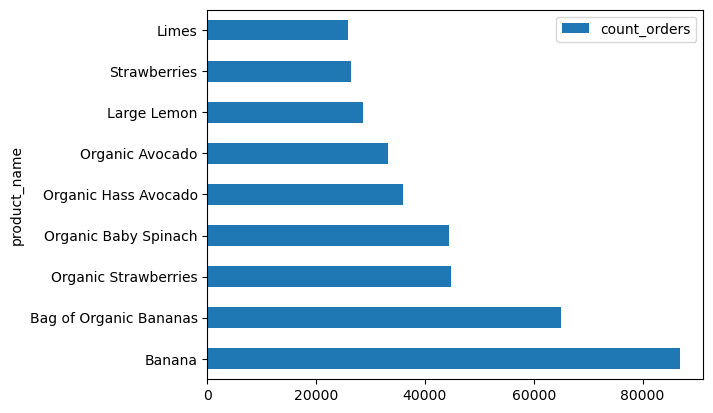

In [60]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [61]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YRC_Products.png'))